In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [3]:
class MyFakeClassfier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

digits =load_digits()
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [5]:
fakeclf = MyFakeClassfier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)


In [6]:
print(accuracy_score(y_test, fakepred))

0.9


In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('accuracy: {0:.4f}, precicion: {1:.4f}, recall: {2:.4f}'.format(accuracy, precision, recall))

In [5]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def encode(df):
    df['Cabin'] = titanic_df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def tranform_feature(df):
    df = fillna(df)
    df = drop(df)
    df = encode(df)
    return df

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanid_df = titanic_df.drop('Survived', axis=1)
X_titanid_df = tranform_feature(X_titanid_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanid_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precicion: 0.8246, recall: 0.7705


In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print(pred_proba.shape)
print(pred_proba[:3])

import numpy as np
print(np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)[:3])

(179, 2)
[[0.44890746 0.55109254]
 [0.86309497 0.13690503]
 [0.86409996 0.13590004]]
[[0.44890746 0.55109254 1.        ]
 [0.86309497 0.13690503 0.        ]
 [0.86409996 0.13590004 0.        ]]


In [15]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precicion: 0.8246, recall: 0.7705


In [16]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
accuracy: 0.8212, precicion: 0.7042, recall: 0.8197


In [17]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_1)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[97 21]
 [11 50]]
accuracy: 0.8212, precicion: 0.7042, recall: 0.8197
오차행렬
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precicion: 0.7869, recall: 0.7869
오차행렬
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precicion: 0.8246, recall: 0.7705
오차행렬
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precicion: 0.8654, recall: 0.7377
오차행렬
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precicion: 0.8980, recall: 0.7213


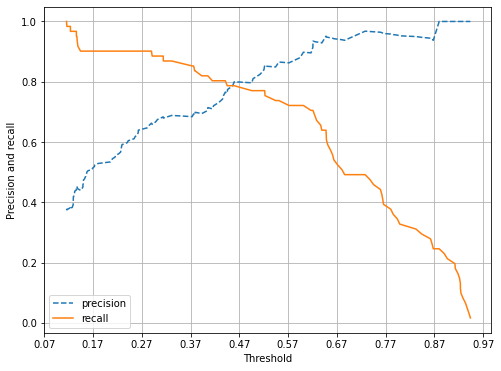

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

plt.figure(figsize=(8,6))
thresholds_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel('Threshold')
plt.ylabel('Precision and recall')
plt.legend(); plt.grid()
plt.show()

In [22]:
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('accuracy: {0:.4f}, precicion: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


오차행렬
[[97 21]
 [11 50]]
accuracy: 0.8212, precicion: 0.7042, recall: 0.8197, f1: 0.7576
오차행렬
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precicion: 0.7869, recall: 0.7869, f1: 0.7869
오차행렬
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precicion: 0.8246, recall: 0.7705, f1: 0.7966
오차행렬
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precicion: 0.8654, recall: 0.7377, f1: 0.7965
오차행렬
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precicion: 0.8980, recall: 0.7213, f1: 0.8000


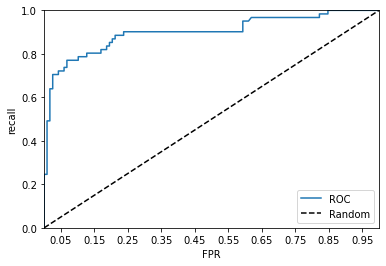

In [24]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], 'k--', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start,end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR'); plt.ylabel('recall');
plt.legend()





In [25]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, pred_proba))

0.8997638232842456
